In [1]:
# 1
%matplotlib inline
import numpy as np
import pandas as pd
import os,sys
import utilities as utils
import matplotlib.pyplot as plt

In [2]:
# 2
df_sum = pd.read_hdf('data_ori.h5','df')

In [3]:
# 3
total_id = df_sum['Station ID'].values
total_id_uniq = np.unique(total_id)
print(total_id_uniq,len(total_id_uniq))

[  3   5   7   8   9  10  11  12  13  14  15  17  18  19  21  23  24  25
  26  27  30  31  32  33  34  35  36  37  39  40  41  42  43  44  45  46
  47  49  50  51  53  54  55  56  57  59  60  61  62  63  64  65  66  68
  69  70  71  72  73  75  76  79  80  81  82  84  85  87  88  89  92  93
  94  95  96  97  98  99 100 103 104 105 106 107 109 111 121 122] 88


In [6]:
# 4
id_record_dict = {}
for id in total_id_uniq:
    id_record_dict[id] = len(df_sum[df_sum['Station ID'] == id])
    # print(id,len(df_sum[df_sum['Station ID'] == id]))

In [7]:
# 5
indices = np.linspace(0,122,123,dtype=int)
# print(indices)
indices1 = np.zeros(np.max(total_id_uniq)+1)
indices2 = np.zeros(np.max(total_id_uniq)+1)

In [8]:
# 6
lat = (46.51788,46.52227)
log = (6.56517,6.5693)

loc_file = '/home/esmidth/code/DCS_COPY/DCS/Original_Data/Sensorscope/EPFL_sensor_loc_simple2.xlsx'
df = pd.read_excel(loc_file)

lat_range = np.linspace(lat[0],lat[1],11)
log_range = np.linspace(log[0],log[1],11)
# print(lat_range)
# print(log_range)

In [9]:
# 7
def draw_lune_heatmap(df,res,lat=lat,log=log):
    # res refers to resolution
    lat_range = np.linspace(lat[1],lat[0],res+1)
    log_range = np.linspace(log[0],log[1],res+1)
    pic = np.zeros((res,res))
    pic2 = np.zeros((res,res))
    pairs = []
    for i in range(res):
        # print(i,lat_range[i],lat_range[i+1])
        for j in range(res):
            sub_df = df[(df['Latitude'] < lat_range[i]) & (df['Latitude'] > lat_range[i+1]) & (df['Longitude'] > log_range[j]) & (df['Longitude'] < log_range[j+1])]
            pic[i][j] = len(sub_df)
            if len(sub_df) > 0:
                pic2[i][j]=1
            # pic[i][j] = i*res+j
            if len(sub_df) > 1:
                pairs.append([i*res+j,sub_df['ID'].values])
                #pairs ( offset, [pair])
            max_value = 0
            max_id = 0
            for value in sub_df['ID'].values:
                # print(value)
                if len(sub_df[sub_df['ID'] == value]) > max_value:
                    max_id =value
            pic[i][j] = max_id
    return pic,pairs,pic2
# 输出的pic有颜色明暗，pic2为黑白两色

[[14, array([ 3, 23, 42])], [15, array([ 5, 17])], [24, array([21, 26, 41])], [25, array([14, 30, 39, 56])], [26, array([  9,  15,  18,  24,  37,  44, 105, 121])], [27, array([12, 45, 46])], [28, array([ 8, 25, 36])], [33, array([64, 75, 99])], [36, array([13, 40])], [37, array([ 34,  43, 106])], [53, array([ 70, 122])], [54, array([49, 68])], [63, array([66, 72])], [64, array([54, 73])], [66, array([ 32,  35,  50,  94, 107])], [69, array([79, 95])], [75, array([92, 97])], [77, array([33, 53])], [78, array([10, 19])], [91, array([85, 89])]]
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 63.   0.   0.   0.  42.  17.   0.   0.   0.   0.]
 [ 47.   7.  27.   0.  41.  56. 121.  46.  36.   0.]
 [  0.   0. 111.  99.  57.  59.  40. 106.   0.   0.]
 [  0.  61.  71.  65.   0.  82.  62.   0.  76.   0.]
 [  0.  51.  11. 122.  68.   0.   0.  60.   0.   0.]
 [ 84.  81.  55.  72.  73.   0. 107.  31.  69.  95.]
 [103.  80.  96.   0.   0.  97. 100.  53.  19.  93.]
 [109.  87.   0.   0. 104.   

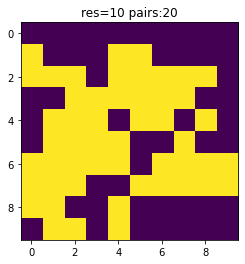

In [10]:
# 8
res = 10
pic,pairs,pic2 = draw_lune_heatmap(df,res,lat,log)
plt.title('res='+str(res)+' pairs:'+str(len(pairs)))
plt.grid(b=False)
plt.imshow(pic2)
print(pairs)
print(pic)

In [11]:
# 9 new
pair_max = []
# (max_id, pair_items)
for pair in pairs:
    tmp_dict ={}
    for item in pair[1]:
        # print(item)
        tmp_len = len(df_sum[df_sum['Station ID'] == item])
        tmp_dict[item] = tmp_len
        print(item,tmp_len)
    # print(np.max(tmp_array))
    # print(tmp_array == np.max(tmp_array))
    # print(tmp_dict.keys())
    # print(tmp_dict.items())
    tmp = sorted(tmp_dict.items(),key=lambda kv:(kv[1],kv[0]),reverse=True)[0][0]
    pair_max.append((tmp,pair[1]))
    print('max id: ',tmp)
    # print(np.max(tmp_dict.values.items())
    # print(sorted(key_value.items(), key = lambda kv:(kv[1], kv[0])))    
    print('----')
pair_max = np.array(pair_max)
print(pair_max.T[0])
print(len(pair_max))

3 463366
23 508496
42 476141
max id:  23
----
5 473401
17 508058
max id:  17
----
21 516111
26 523660
41 492508
max id:  26
----
14 507791
30 459515
39 498798
56 348901
max id:  14
----
9 419401
15 507981
18 510324
24 515165
37 481248
44 502059
105 340836
121 1268694
max id:  121
----
12 495806
45 496420
46 509826
max id:  46
----
8 508506
25 486527
36 484879
max id:  8
----
64 307468
75 371510
99 254211
max id:  75
----
13 446626
40 465524
max id:  40
----
34 515546
43 474557
106 358605
max id:  34
----
70 477651
122 378219
max id:  70
----
49 449340
68 368898
max id:  49
----
66 448698
72 462363
max id:  72
----
54 447130
73 457270
max id:  73
----
32 486101
35 520571
50 452121
94 258488
107 367659
max id:  35
----
79 421204
95 366746
max id:  79
----
92 441339
97 455939
max id:  97
----
33 489204
53 481535
max id:  33
----
10 365048
19 468463
max id:  19
----
85 446444
89 457590
max id:  89
----
[23 17 26 14 121 46 8 75 40 34 70 49 72 73 35 79 97 33 19 89]
20
ipykernel_launcher:21: 

In [12]:
# 10
for item in pair_max:
    for id in item[1]:
        df_sum.loc[df_sum['Station ID'] == id,'Station ID'] = item[0]
        print('ori',id,'max:',item[0])

ori 3 max: 23
ori 23 max: 23
ori 42 max: 23
ori 5 max: 17
ori 17 max: 17
ori 21 max: 26
ori 26 max: 26
ori 41 max: 26
ori 14 max: 14
ori 30 max: 14
ori 39 max: 14
ori 56 max: 14
ori 9 max: 121
ori 15 max: 121
ori 18 max: 121
ori 24 max: 121
ori 37 max: 121
ori 44 max: 121
ori 105 max: 121
ori 121 max: 121
ori 12 max: 46
ori 45 max: 46
ori 46 max: 46
ori 8 max: 8
ori 25 max: 8
ori 36 max: 8
ori 64 max: 75
ori 75 max: 75
ori 99 max: 75
ori 13 max: 40
ori 40 max: 40
ori 34 max: 34
ori 43 max: 34
ori 106 max: 34
ori 70 max: 70
ori 122 max: 70
ori 49 max: 49
ori 68 max: 49
ori 66 max: 72
ori 72 max: 72
ori 54 max: 73
ori 73 max: 73
ori 32 max: 35
ori 35 max: 35
ori 50 max: 35
ori 94 max: 35
ori 107 max: 35
ori 79 max: 79
ori 95 max: 79
ori 92 max: 97
ori 97 max: 97
ori 33 max: 33
ori 53 max: 33
ori 10 max: 19
ori 19 max: 19
ori 85 max: 89
ori 89 max: 89


In [13]:
# 11
total_id_uniq_new = np.unique(df_sum['Station ID'].values)
id_record_dict_new = {}
for item in total_id_uniq:
    id_record_dict_new[item]  = 0

for item in total_id_uniq_new:
    id_record_dict_new[item] = len(df_sum[df_sum['Station ID'] == item])

In [14]:
print('id','\tbefore','\t\tafter')
for id in total_id_uniq:
    print(id,'\t',id_record_dict[id],'\t',id_record_dict_new[id])

id 	before 		after
3 	 463366 	 0
5 	 473401 	 0
7 	 131753 	 131753
8 	 508506 	 1479912
9 	 419401 	 0
10 	 365048 	 0
11 	 474258 	 474258
12 	 495806 	 0
13 	 446626 	 0
14 	 507791 	 1815005
15 	 507981 	 0
17 	 508058 	 981459
18 	 510324 	 0
19 	 468463 	 833511
21 	 516111 	 0
23 	 508496 	 1448003
24 	 515165 	 0
25 	 486527 	 0
26 	 523660 	 1532279
27 	 122838 	 122838
30 	 459515 	 0
31 	 475734 	 475734
32 	 486101 	 0
33 	 489204 	 970739
34 	 515546 	 1348708
35 	 520571 	 2084940
36 	 484879 	 0
37 	 481248 	 0
39 	 498798 	 0
40 	 465524 	 912150
41 	 492508 	 0
42 	 476141 	 0
43 	 474557 	 0
44 	 502059 	 0
45 	 496420 	 0
46 	 509826 	 1502052
47 	 132309 	 132309
49 	 449340 	 818238
50 	 452121 	 0
51 	 463746 	 463746
53 	 481535 	 0
54 	 447130 	 0
55 	 466390 	 466390
56 	 348901 	 0
57 	 409707 	 409707
59 	 275774 	 275774
60 	 462547 	 462547
61 	 267775 	 267775
62 	 325345 	 325345
63 	 287042 	 287042
64 	 307468 	 0
65 	 364818 	 364818
66 	 448698 	 0
6

In [16]:
# 12
for item in total_id_uniq:
    indices1[item] = id_record_dict[item]
for item in total_id_uniq_new:
    indices2[item] = id_record_dict_new[item]

<BarContainer object of 123 artists>

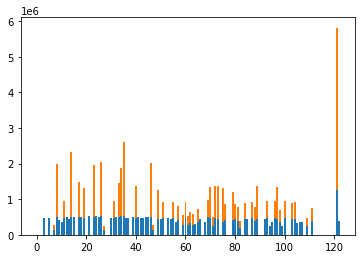

In [18]:
# 13 Vital Figure
plt.bar(indices,indices1)
plt.bar(indices,indices2,bottom=indices1)

In [19]:
# 14 Vital Figure
df_sum.to_hdf('df_sum_new.h5','df_sum')